In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import random
from pathlib import Path
import os
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
import plotly.express as px

In [132]:
def get_city_data(city_name:str):
    csv_paths =  list(Path(f"AQ_data/{city_name}").rglob("**/*.csv"))  # store once
    city_dfs = []
    for f in csv_paths:
        df = pd.read_csv(f, index_col=['Timestamp'], parse_dates=True)
        city_dfs.append(df)

    city_data = pd.concat(city_dfs)
    return city_data

In [92]:
def get_pollutants_from_location(city_name:str, location_name:str):
    csv_paths =  list(Path(".").rglob(f"./AQ_data/{city_name}/{location_name}/**/**/*.csv"))  # store once
    city_dfs = []
    for f in csv_paths:
        df = pd.read_csv(f, index_col=['Timestamp'], parse_dates=True)
        city_dfs.append(df)

    city_data = pd.concat(city_dfs)
    return city_data['pollutant'].unique().tolist()

In [93]:
city="New Delhi"
location_name="DwarkaSector_8_Delhi__DPCC_"
get_pollutants_from_location(city, location_name)

['co',
 'no',
 'no2',
 'o3',
 'pm10',
 'pm25',
 'relativehumidity',
 'so2',
 'temperature']

In [133]:
bangalore_data = get_city_data("Bangalore")
delhi_data = get_city_data("New Delhi")
sacremento_data = get_city_data("Sacremento")
chicago_data = get_city_data("Chicago")

In [113]:
def get_pollutants(df):
    return df['pollutant'].unique().tolist()

list(bangalore_data.groupby('location_name').apply(get_pollutants, include_groups=False).values)

[['co',
  'no',
  'no2',
  'o3',
  'pm10',
  'pm25',
  'relativehumidity',
  'so2',
  'temperature'],
 ['co', 'pm25', 'so2', 'no2', 'o3'],
 ['pm10', 'so2', 'no2', 'co', 'o3', 'pm25'],
 ['so2', 'pm25', 'o3', 'no2', 'co'],
 ['co',
  'no',
  'no2',
  'o3',
  'pm10',
  'pm25',
  'relativehumidity',
  'so2',
  'temperature'],
 ['pm10', 'no2', 'co', 'so2'],
 ['co', 'no', 'no2', 'pm10', 'so2'],
 ['co',
  'no',
  'no2',
  'o3',
  'pm10',
  'pm25',
  'relativehumidity',
  'so2',
  'temperature'],
 ['co',
  'no',
  'no2',
  'o3',
  'pm10',
  'pm25',
  'relativehumidity',
  'so2',
  'temperature'],
 ['co',
  'no',
  'no2',
  'o3',
  'pm10',
  'pm25',
  'relativehumidity',
  'so2',
  'temperature'],
 ['co',
  'no',
  'no2',
  'o3',
  'pm10',
  'pm25',
  'relativehumidity',
  'so2',
  'temperature'],
 ['co',
  'no',
  'no2',
  'o3',
  'pm10',
  'pm25',
  'relativehumidity',
  'so2',
  'temperature'],
 ['pm25', 'so2', 'no2', 'co'],
 ['co',
  'no',
  'no2',
  'o3',
  'pm10',
  'pm25',
  'relativehumi

<Axes: title={'center': 'Number of pollutants monitored per location in Bangalore'}, xlabel='Location Name', ylabel='Number of pollutants'>

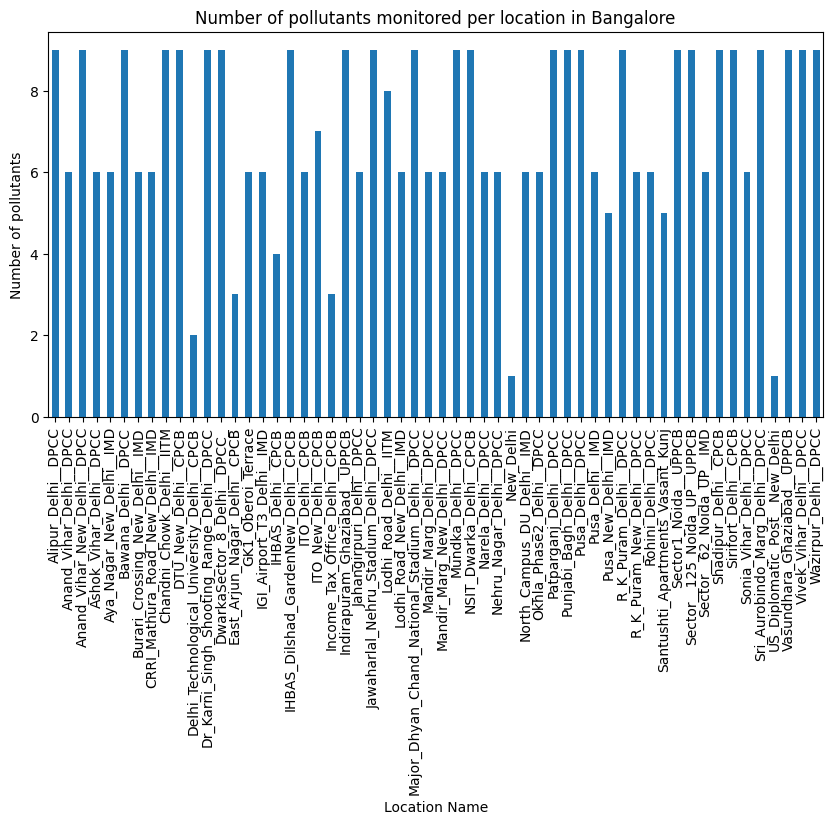

In [103]:
delhi_data.groupby('location_name').apply(get_pollutants, include_groups=False).plot(kind='bar', 
                                                                                         title='Number of pollutants monitored per location in Bangalore',
                                                                                         ylabel='Number of pollutants', xlabel='Location Name', figsize=(10,5))

<Axes: title={'center': 'Number of pollutants monitored per location in Bangalore'}, xlabel='Location Name', ylabel='Number of pollutants'>

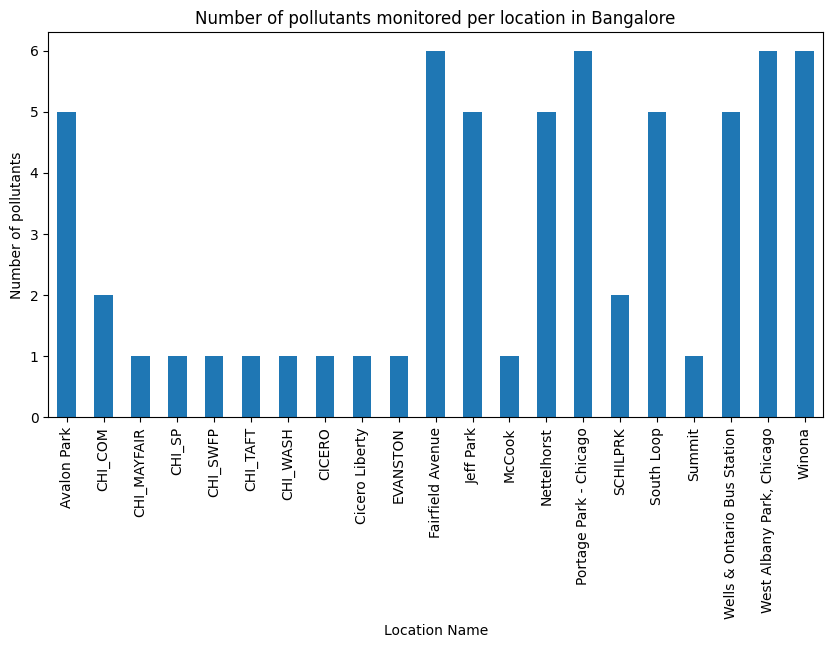

In [104]:
chicago_data.groupby('location_name').apply(get_pollutants, include_groups=False).plot(kind='bar', 
                                                                                         title='Number of pollutants monitored per location in Bangalore',
                                                                                         ylabel='Number of pollutants', xlabel='Location Name', figsize=(10,5))

<Axes: title={'center': 'Number of pollutants monitored per location in Bangalore'}, xlabel='Location Name', ylabel='Number of pollutants'>

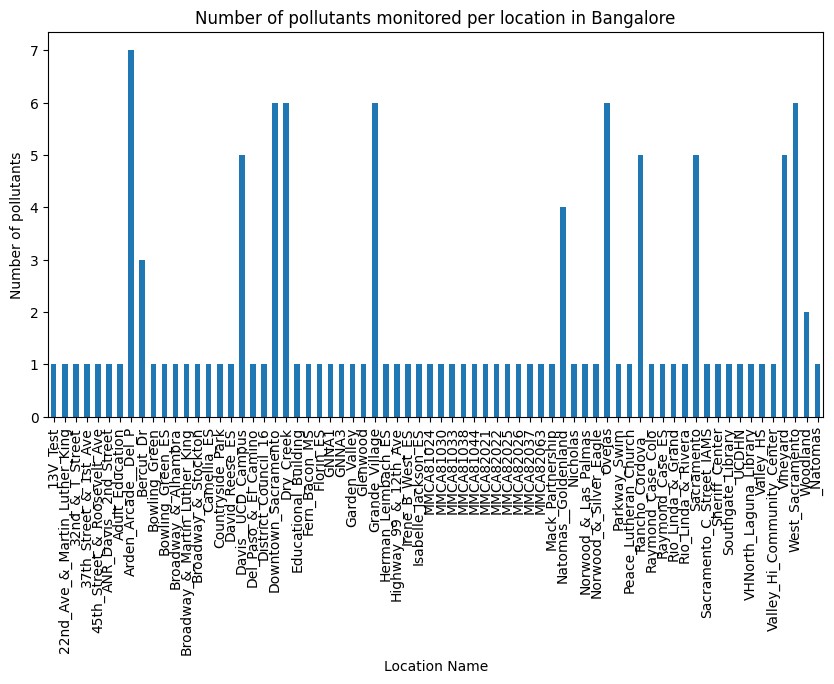

In [105]:
sacremento_data.groupby('location_name').apply(get_pollutants, include_groups=False).plot(kind='bar', 
                                                                                         title='Number of pollutants monitored per location in Bangalore',
                                                                                         ylabel='Number of pollutants', xlabel='Location Name', figsize=(10,5))

In [126]:
def get_pollutants(df):
    return df['pollutant'].unique().tolist()

def plot_locations(df:pd.DataFrame, city_name):
    unique_locations_df = df.groupby('location_name').sample(1)
    unique_locations_df['readings_available'] = df.groupby('location_name').apply(get_pollutants, include_groups=False).values
    unique_locations_df['size'] = 1
    fig = px.scatter_map(
    unique_locations_df,
    lat="latitude",
    lon="longitude",
    hover_name="location_name",
    size='size',
    hover_data={"size":False, "latitude":False, "longitude":False, 'readings_available':True},
    zoom=10,
    width=1000,
    height=700)  
    
    latitude = unique_locations_df['latitude'].mean()
    longitude = unique_locations_df['longitude'].mean()
    

    fig.update_layout(
        title=f"Locations in the {city_name} Region",
        geo=dict(
            center=dict(lat=latitude, lon=longitude), # Coordinates for city
            projection_scale=100 # Adjust this value to zoom in or out
        )
    )
    return fig


In [130]:
fig = plot_locations(bangalore_data, 'Bangalore')
fig.show()

In [4]:
df.reset_index().columns

Index(['Timestamp', 'min', 'q02', 'q25', 'median', 'q75', 'q98', 'max', 'avg',
       'sd', 'pollutant', 'location_name', 'latitude', 'longitude', 'unit',
       'sensor_id', 'city_name', 'state', 'country'],
      dtype='object')

In [6]:
locs = random.sample(df.location_name.unique().tolist(), k=5)
pattern = "|".join(locs)
locs_df = df[df.location_name.str.contains(pattern)]

In [7]:
sub_df = locs_df.groupby(['location_name','latitude','longitude'], as_index=False)['avg'].mean()

In [12]:
sub_df

,location_name,latitude,longitude,avg
0,"BTM Layout, Bengaluru - KSPCB",12.912811,77.609219,187.222116
1,"Bapuji Nagar, Bengaluru - KSPCB",12.951913,77.539784,26.064102
2,SaneguravaHalli - KSPCB,12.991669,77.545831,178.069638
3,"Shivapura_Peenya, Bengaluru - KSPCB",13.024634,77.508011,2616.146341
4,"Silk Board, Bengaluru - KSPCB",12.917348,77.622813,138.736770


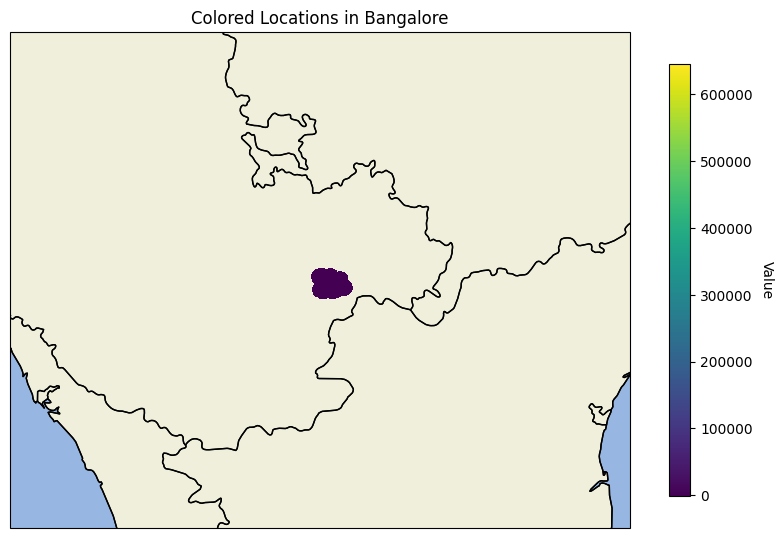

In [11]:
# Create a figure and axes with a Plate Carree projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the map's extent to focus on Bangalore
# This is the key change from a large-scale map
ax.set_extent([75, 80, 11, 15], crs=ccrs.PlateCarree())

# Add map features for context, such as land, ocean, and state borders
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES)

# Plot the data points, coloring them by the 'value' column
scatter = ax.scatter(df['longitude'], df['latitude'],
                     c=df['avg'], cmap='viridis', s=100,
                     transform=ccrs.PlateCarree())

# Add a color bar to explain the colors
cbar = fig.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label('Value', rotation=270, labelpad=15)

# Add titles and show the plot
ax.set_title('Colored Locations in Bangalore')
plt.show()

In [21]:
import plotly.express as px

fig = px.scatter_map(
    sub_df,
    lat="latitude",
    lon="longitude",
    size="avg",
    hover_name="location_name",
    size_max=45,
    zoom=10,  # zoom in to Bangalore
)

fig.show()

In [3]:
[f for f in csv_paths if location in str(f)]

[WindowsPath('AQ_data/Bangalore/BTM Layout, Bengaluru - CPCB/12235356/2025/06/co_12235356.csv'),
 WindowsPath('AQ_data/Bangalore/BTM Layout, Bengaluru - CPCB/12235356/2025/12/co_12235356.csv'),
 WindowsPath('AQ_data/Bangalore/BTM Layout, Bengaluru - CPCB/12235357/2025/06/no_12235357.csv'),
 WindowsPath('AQ_data/Bangalore/BTM Layout, Bengaluru - CPCB/12235357/2025/12/no_12235357.csv'),
 WindowsPath('AQ_data/Bangalore/BTM Layout, Bengaluru - CPCB/12235358/2025/06/no2_12235358.csv'),
 WindowsPath('AQ_data/Bangalore/BTM Layout, Bengaluru - CPCB/12235358/2025/12/no2_12235358.csv'),
 WindowsPath('AQ_data/Bangalore/BTM Layout, Bengaluru - CPCB/12235359/2025/06/o3_12235359.csv'),
 WindowsPath('AQ_data/Bangalore/BTM Layout, Bengaluru - CPCB/12235359/2025/12/o3_12235359.csv'),
 WindowsPath('AQ_data/Bangalore/BTM Layout, Bengaluru - CPCB/12235360/2025/06/pm10_12235360.csv'),
 WindowsPath('AQ_data/Bangalore/BTM Layout, Bengaluru - CPCB/12235360/2025/12/pm10_12235360.csv'),
 WindowsPath('AQ_data/Ba

In [25]:
import numpy as np

In [34]:
df['pollutant'].unique()

array(['co', 'no', 'no2', 'o3', 'pm10', 'pm25', 'relativehumidity', 'so2',
       'temperature', 'pm1', 'um003'], dtype=object)

In [30]:
mask = (df['location_name'] == location) & (df.index.year == int(year))

In [32]:
df[mask].pollutant.unique()

array(['pm25', 'no2', 'so2', 'co', 'o3'], dtype=object)

In [7]:
pd.read_csv(csv_paths[0]).columns

Index(['id', 'pollutant', 'units'], dtype='object')

In [ ]:
# year_files = [f for f in csv_paths if year in f.name]
location_files = [f for f in year_files if location in str(f)]

[]

In [8]:
csv_paths[0]

WindowsPath('parameter_ids.csv')

In [32]:
[str(f).split("\\")[2] for f in year_files]

['Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',


In [11]:
year_files

[]

In [34]:
yield csv_paths

SyntaxError: 'yield' outside function (3044586234.py, line 1)